In [1]:
import pandas as pd

In [2]:
# reading the data from the csv file
data = pd.read_csv('emotions.csv')
X = data.drop("label", axis=1)

In [3]:
# shape of data
data.shape

(2132, 2549)

In [4]:
# data example
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [5]:
# encoding the class from labels to numbers (0, 1, 2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [6]:
# array only for the class
y = data['label']

In [7]:
from matplotlib import pyplot

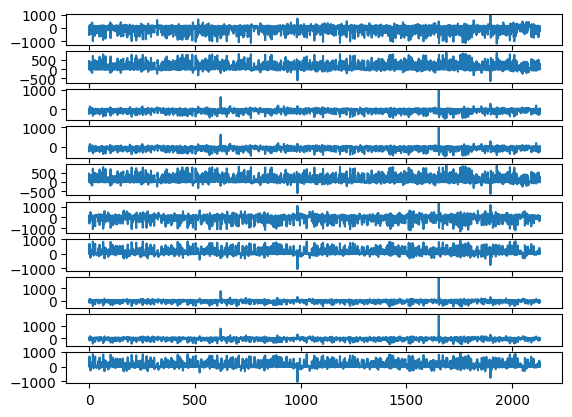

In [8]:
# create a subplot for each time series
values = data.loc[:,'fft_0_b':'fft_9_b'].values
pyplot.figure()
for i in range(values.shape[1]):
    pyplot.subplot(values.shape[1], 1, i+1)
    pyplot.plot(values[:, i])
pyplot.show()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# calling the train function and spliting the data to train and test sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=40)

In [11]:
# transforming the class labels from numbers to binary
# example:                     0 1 2
# 1009    2             1009   0 0 1
# 1150    1      ->     1150   0 1 0
# 1460    0             1460   1 0 0
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [12]:
# categories distribution
y_test.value_counts()

0  1  2
1  0  0    252
0  1  0    238
   0  1    221
dtype: int64

------------------------------------- MultiLayer Perceptron ------------------------------------------

In [13]:
from sklearn.neural_network import MLPClassifier

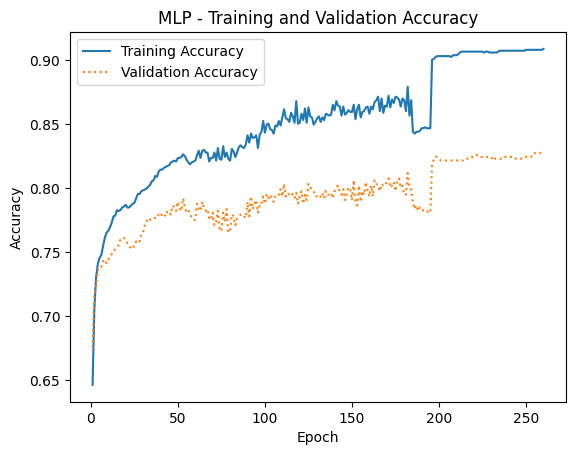

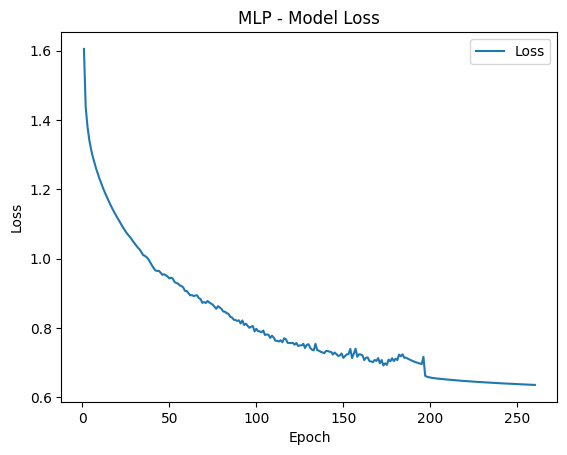

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

test_k_values = range(1, 261)
loss = []
test_k_values_accuracy = []
train_k_values_accuracy = []

# calling the classifier
test_mlp = MLPClassifier(hidden_layer_sizes=(7000,100), activation='logistic', solver='sgd',
            learning_rate_init=0.01, learning_rate='adaptive', max_iter=260, verbose=False,
            random_state=1, alpha=0.01, n_iter_no_change=10, tol=1e-4, batch_size=30)

# evaluating accuracy and loss
for k in test_k_values:
    loss.append(test_mlp.partial_fit(X_train, y_train, np.unique(y)).loss_)
    test_k_values_accuracy.append(test_mlp.score(X_test, y_test))
    train_k_values_accuracy.append(test_mlp.score(X_train, y_train))
    k=k+1

# summarize history for accuracy
plt.plot(test_k_values, train_k_values_accuracy, '-', label="Training Accuracy")
plt.plot(test_k_values, test_k_values_accuracy, ':', label="Validation Accuracy")
plt.title('MLP - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# summarize history for loss
plt.plot(test_k_values, loss, '-', label="Loss")
plt.title('MLP - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# prediction of the algorithm form the training set
y_pred = test_mlp.predict(X_train)
model_acc_train = accuracy_score(y_train, y_pred)

In [17]:
# prediction of the algorithm form the testing set
y_pred = test_mlp.predict(X_test)
model_acc_test = accuracy_score(y_test, y_pred)

In [18]:
print("MLP - Training Accuracy: %.1f" %  (model_acc_train*100))
print("MLP - Testing Accuracy: %.1f" % (model_acc_test*100))
print("MLP - Loss: %.2f" % loss[-1])

MLP - Training Accuracy: 90.9
MLP - Testing Accuracy: 82.8
MLP - Loss: 0.64


------------------------------------------- Keras Model -----------------------------------------------

In [19]:
# determine the number of input features
Keras_n_features = X_train.shape

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import Flatten

# define Keras model
Keras_model = Sequential()
# adding dense layers
Keras_model.add(Dense(512, input_shape=Keras_n_features[1:]))
Keras_model.add(Dense(512, activation='sigmoid'))
Keras_model.add(Dense(512, activation='sigmoid'))
# adding output layer
Keras_model.add(Dense(3, activation='softmax'))

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# calculating early stopping and learning rate scheduler
Keras_es = EarlyStopping(monitor='val_loss', mode='min', verbose=10, patience=10)
Keras_lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch:0.01 * np.exp(-epoch / 10.))

In [22]:
from tensorflow.keras import optimizers

# compiling the model
Keras_opt_adam = optimizers.Adam(learning_rate=0.01)
Keras_model.compile(optimizer=Keras_opt_adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [23]:
# model summary
Keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1305088   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 1,831,939
Trainable params: 1,831,939
Non-trainable params: 0
_________________________________________________________________


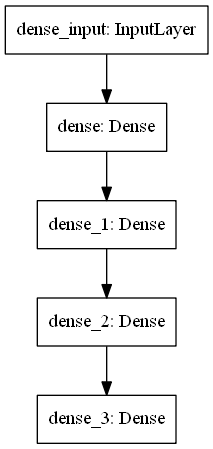

In [24]:
# model image
tf.keras.utils.plot_model(Keras_model)

In [25]:
# training the model
Keras_hist = Keras_model.fit(X_train, y_train, epochs=30, batch_size=50, verbose=0, 
                             validation_data=(X_test, y_test), callbacks=[Keras_es, Keras_lr_schedule])

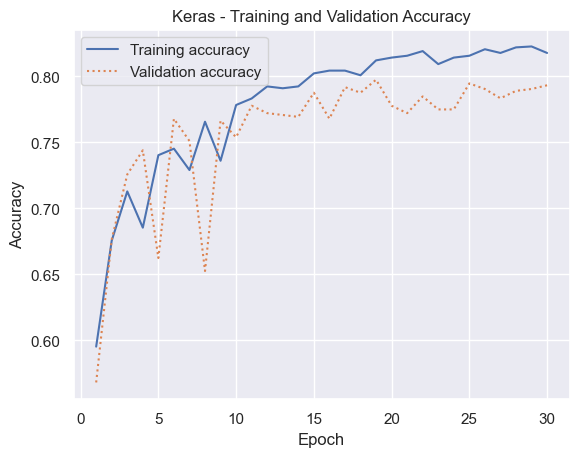

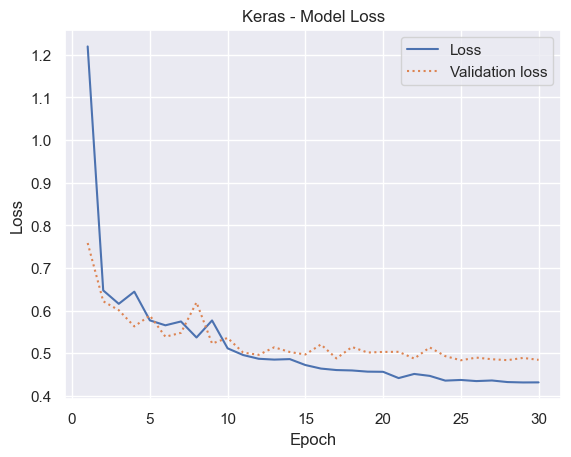

In [26]:
import seaborn as sns
sns.set()
 
Keras_acc = Keras_hist.history['accuracy']
Keras_val = Keras_hist.history['val_accuracy']
Keras_epochs = range(1, len(Keras_acc) + 1)

# summarize history for accuracy
plt.plot(Keras_epochs, Keras_acc, '-', label='Training accuracy')
plt.plot(Keras_epochs, Keras_val, ':', label='Validation accuracy')
plt.title('Keras - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# summarize history for loss
Keras_loss = Keras_hist.history['loss']
Keras_val_loss = Keras_hist.history['val_loss']

plt.plot(Keras_epochs, Keras_loss, '-', label='Loss')
plt.plot(Keras_epochs, Keras_val_loss, ':', label='Validation loss')
plt.title('Keras - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [27]:
# evaluating the model
Keras_model_acc_train = Keras_model.evaluate(X_train, y_train,verbose=0)
Keras_model_acc_test = Keras_model.evaluate(X_test, y_test,verbose=0)

In [28]:
print("Keras - Training Accuracy: %.1f" % (Keras_model_acc_train[1]*100))
print("Keras - Testing Accuracy: %.1f" % (Keras_model_acc_test[1]*100))
print("Keras - Loss: %.2f" % Keras_loss[-1])

Keras - Training Accuracy: 82.2
Keras - Testing Accuracy: 79.3
Keras - Loss: 0.43


------------------------------------- Long Short-Term Memory -----------------------------------------

In [29]:
# Expanding the dimensions from 2D to 3D as needed for the LSTM, GRU amd CNN models
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))

In [30]:
# Determine the number of input features
n_features = X_train.shape

In [31]:
from tensorflow.keras.layers import LSTM

# define LSTM model
LSTM_model = Sequential()
# adding LSTM layer
LSTM_model.add(LSTM(3, input_shape=n_features[1:], return_sequences=True))
# adding fully connected layer
LSTM_model.add(Flatten())
# adding output layer
LSTM_model.add(Dense(3, activation='softmax'))

In [32]:
# calculating early stopping and learning rate scheduler
LSTM_es = EarlyStopping(monitor='val_loss', mode='min', verbose=10, patience=10)
LSTM_lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

In [33]:
# compiling the model
LSTM_opt_adam = optimizers.Adam(learning_rate=0.001)
LSTM_model.compile(optimizer=LSTM_opt_adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [34]:
# model summary
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2548, 3)           60        
_________________________________________________________________
flatten (Flatten)            (None, 7644)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 22935     
Total params: 22,995
Trainable params: 22,995
Non-trainable params: 0
_________________________________________________________________


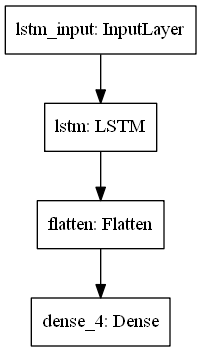

In [35]:
# model image
tf.keras.utils.plot_model(LSTM_model)

In [36]:
# training the model
LSTM_hist = LSTM_model.fit(X_train, y_train, epochs=7, batch_size=50, verbose=0, 
                 validation_data=(X_test, y_test), callbacks=[LSTM_es, LSTM_lr_schedule])

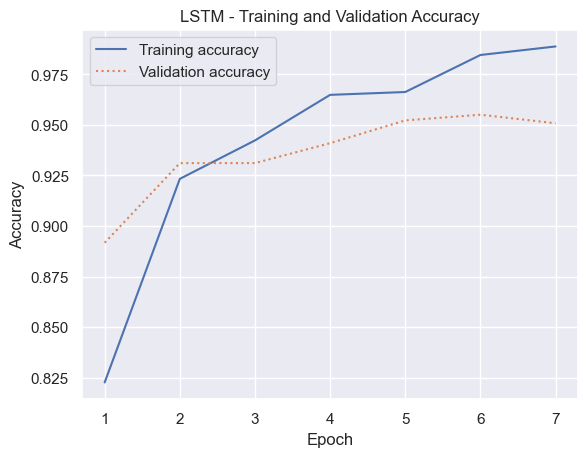

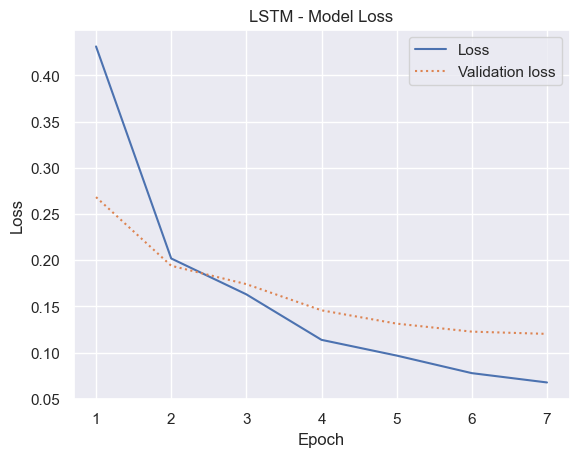

In [37]:
LSTM_acc = LSTM_hist.history['accuracy']
LSTM_val = LSTM_hist.history['val_accuracy']
LSTM_epochs = range(1, len(LSTM_acc) + 1)

# summarize hisrory for accuracy
plt.plot(LSTM_epochs, LSTM_acc, '-', label='Training accuracy')
plt.plot(LSTM_epochs, LSTM_val, ':', label='Validation accuracy')
plt.title('LSTM - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# summarize history for loss
LSTM_loss = LSTM_hist.history['loss']
LSTM_val_loss = LSTM_hist.history['val_loss']

plt.plot(LSTM_epochs, LSTM_loss, '-', label='Loss')
plt.plot(LSTM_epochs, LSTM_val_loss, ':', label='Validation loss')
plt.title('LSTM - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [38]:
# evaluating the model
LSTM_model_acc_train = LSTM_model.evaluate(X_train, y_train, verbose=0)
LSTM_model_acc_test = LSTM_model.evaluate(X_test, y_test, verbose=0)

In [39]:
print("LSTM - Training Accuracy: %.1f" %  (LSTM_model_acc_train[1]*100))
print("LSTM - Test Accuracy: %.1f" %  (LSTM_model_acc_test[1]*100))
print("LSTM - Loss: %.2f" % LSTM_loss[-1])

LSTM - Training Accuracy: 98.6
LSTM - Test Accuracy: 95.1
LSTM - Loss: 0.07


-------------------------------------- Gated Recurrent Unit ------------------------------------------

In [40]:
from tensorflow.keras.layers import GRU

# define GRU model
GRU_model = Sequential()
# adding GRU layer
GRU_model.add(GRU(200, input_shape=n_features[1:]))
# adding fully connected layer
GRU_model.add(Flatten())
# adding output layer
GRU_model.add(Dense(3, activation="softmax"))

In [41]:
# calculating early stopping and learning rate scheduler
GRU_es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
GRU_lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

In [42]:
# compiling the model
GRU_opt_adam = optimizers.Adam(learning_rate=0.001)
GRU_model.compile(optimizer=GRU_opt_adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [43]:
# model summary
GRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200)               121800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 603       
Total params: 122,403
Trainable params: 122,403
Non-trainable params: 0
_________________________________________________________________


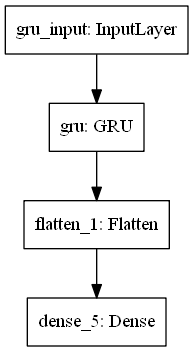

In [44]:
# model image
tf.keras.utils.plot_model(GRU_model)

In [45]:
# training the model
GRU_hist = GRU_model.fit(X_train, y_train, epochs=50, batch_size=30, verbose=0, 
                 validation_data=(X_test, y_test), callbacks=[GRU_es, GRU_lr_schedule])

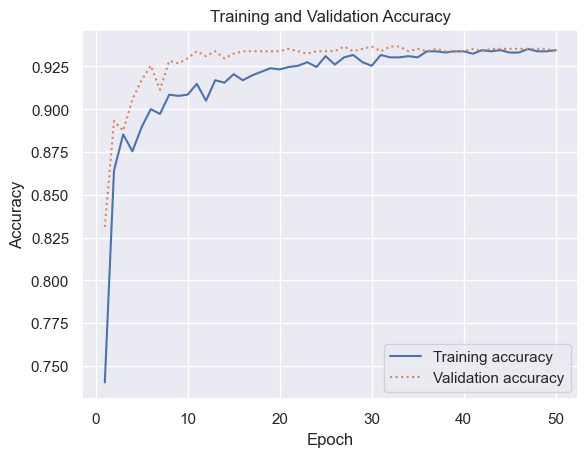

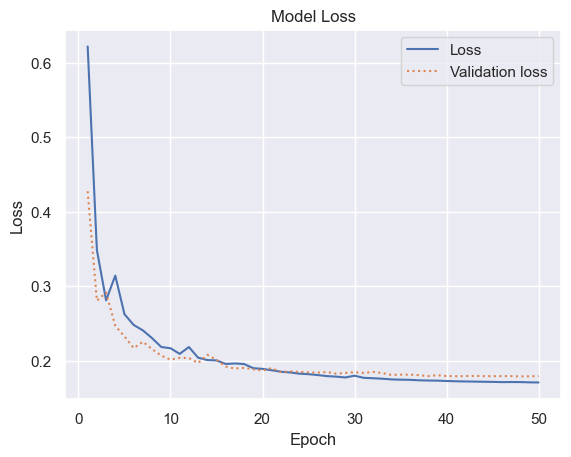

In [46]:
GRU_acc = GRU_hist.history['accuracy']
GRU_val = GRU_hist.history['val_accuracy']
GRU_epochs = range(1, len(GRU_acc) + 1)

# summarize history for accuracy
plt.plot(GRU_epochs, GRU_acc, '-', label='Training accuracy')
plt.plot(GRU_epochs, GRU_val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# summarize history for loss
GRU_loss = GRU_hist.history['loss']
GRU_val_loss = GRU_hist.history['val_loss']

plt.plot(GRU_epochs, GRU_loss, '-', label='Loss')
plt.plot(GRU_epochs, GRU_val_loss, ':', label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [47]:
# evaluating the model
GRU_model_acc_train = GRU_model.evaluate(X_train, y_train, verbose=0)
GRU_model_acc_test = GRU_model.evaluate(X_test, y_test, verbose=0)

In [48]:
print("GRU - Training Accuracy: %.1f" % (GRU_model_acc_train[1]*100))
print("GRU - Testing Accuracy: %.1f" % (GRU_model_acc_test[1]*100))
print("GRU - Loss: %.2f" % GRU_loss[-1])

GRU - Training Accuracy: 93.6
GRU - Testing Accuracy: 93.4
GRU - Loss: 0.17


---------------------------------- Convolutional Neural Network --------------------------------------

In [49]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D

# define CNN model
CNN_model = Sequential()
# adding convolution layer
CNN_model.add(Conv1D(128, kernel_size=4, activation='sigmoid', input_shape=n_features[1:], padding='same'))
# adding pooling layer
CNN_model.add(MaxPool1D(pool_size=2, padding='same'))
# adding fully connected layer
CNN_model.add(Flatten())
# adding output layer
CNN_model.add(Dense(3, activation='softmax'))

In [50]:
# calculating early stopping and learning rate scheduler
CNN_es = EarlyStopping(monitor='val_loss', mode='min', verbose=10, patience=10)
CNN_lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

In [51]:
# compiling the model
CNN_opt_adam = optimizers.Adam(learning_rate=0.001)
CNN_model.compile(optimizer=CNN_opt_adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [52]:
# model summary
CNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2548, 128)         640       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1274, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 163072)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 489219    
Total params: 489,859
Trainable params: 489,859
Non-trainable params: 0
_________________________________________________________________


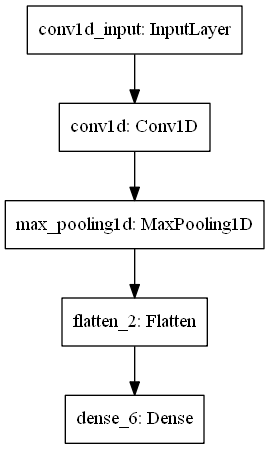

In [53]:
# model image
tf.keras.utils.plot_model(CNN_model)

In [54]:
# fit the model
CNN_hist = CNN_model.fit(X_train, y_train, epochs=10, batch_size=35, verbose=0, 
                 validation_data=(X_test, y_test), callbacks=[CNN_es, CNN_lr_schedule])

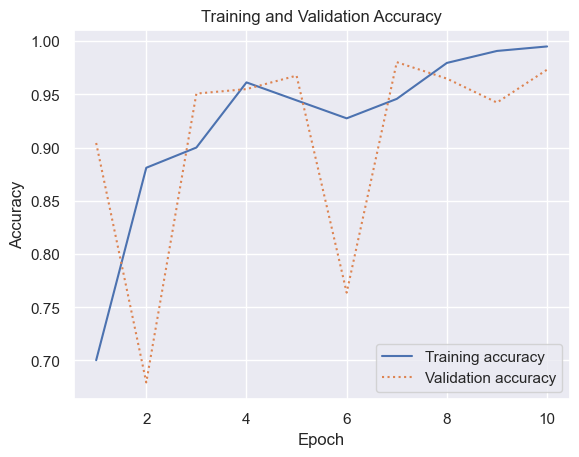

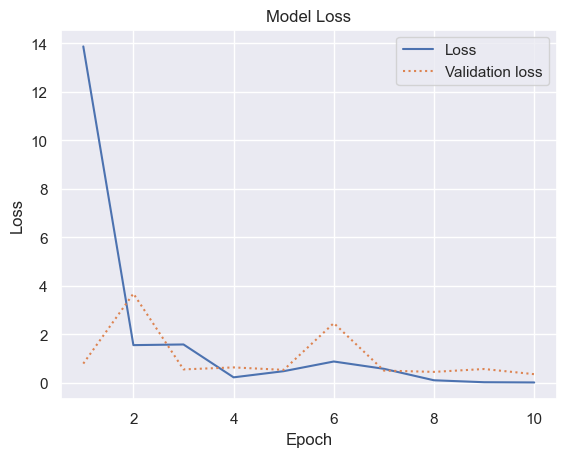

In [55]:
CNN_acc = CNN_hist.history['accuracy']
CNN_val = CNN_hist.history['val_accuracy']
CNN_epochs = range(1, len(CNN_acc) + 1)

# summarize history for accuracy
plt.plot(CNN_epochs, CNN_acc, '-', label='Training accuracy')
plt.plot(CNN_epochs, CNN_val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# summarize history for loss
CNN_loss = CNN_hist.history['loss']
CNN_val_loss = CNN_hist.history['val_loss']

plt.plot(CNN_epochs, CNN_loss, '-', label='Loss')
plt.plot(CNN_epochs, CNN_val_loss, ':', label='Validation loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [56]:
# evaluating the model
CNN_model_acc_train = CNN_model.evaluate(X_train, y_train, verbose=0)
CNN_model_acc_test = CNN_model.evaluate(X_test, y_test, verbose=0)

In [57]:
print("CNN - Training Accuracy: %.1f" % (CNN_model_acc_train[1]*100))
print("CNN - Testing Accuracy: %.1f" % (CNN_model_acc_test[1]*100))
print("CNN - Loss: %.2f" % CNN_loss[-1])

CNN - Training Accuracy: 99.9
CNN - Testing Accuracy: 97.3
CNN - Loss: 0.01
